In [ ]:
#구글 드라이브 연결

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
!pip install dlib

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2023-12-02 07:16:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  32.7MB/s    in 1.9s    

2023-12-02 07:16:16 (32.7 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import dlib
import numpy as np

# Dlib의 얼굴 인식기와 특징점 모델 로드
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def get_face_landmarks(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    for face in faces:
        landmarks = predictor(gray, face)
        # 특징점을 NumPy 배열로 변환
        return np.array([[p.x, p.y] for p in landmarks.parts()])
    return None

def align_faces(image1, image2):
    # 얼굴 특징점 추출
    landmarks1 = get_face_landmarks(image1)
    landmarks2 = get_face_landmarks(image2)

    if landmarks1 is not None and landmarks2 is not None:
        # 얼굴 정렬을 위한 변환 행렬 계산
        transformation_matrix = cv2.estimateAffinePartial2D(landmarks1, landmarks2)[0]
        aligned_face = cv2.warpAffine(image1, transformation_matrix, (image2.shape[1], image2.shape[0]))

        # 얼굴 합성
        combined_face = cv2.addWeighted(aligned_face, 0.5, image2, 0.5, 0)
        return combined_face
    return None


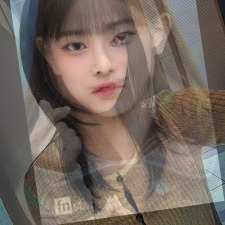

In [ ]:
#group 1(3명)
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image1_1.jpg")
image2 = cv2.imread("/gdrive/My Drive/image1_2.jpg")
image3 = cv2.imread("/gdrive/My Drive/image1_3.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 첫 번째 이미지와 합성한 이미지와 세 번째 이미지 합성
if combined_face_1_2 is not None:
    final_combined_face = align_faces(combined_face_1_2, image3)
    if final_combined_face is not None:
        cv2_imshow(final_combined_face)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


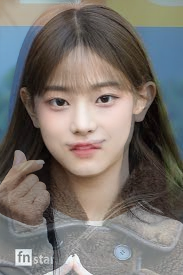

In [ ]:
#group1 (2명)
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image1_1.jpg")
image2 = cv2.imread("/gdrive/My Drive/image1_2.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 합성된 이미지 표시
if combined_face_1_2 is not None:
    cv2_imshow(combined_face_1_2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

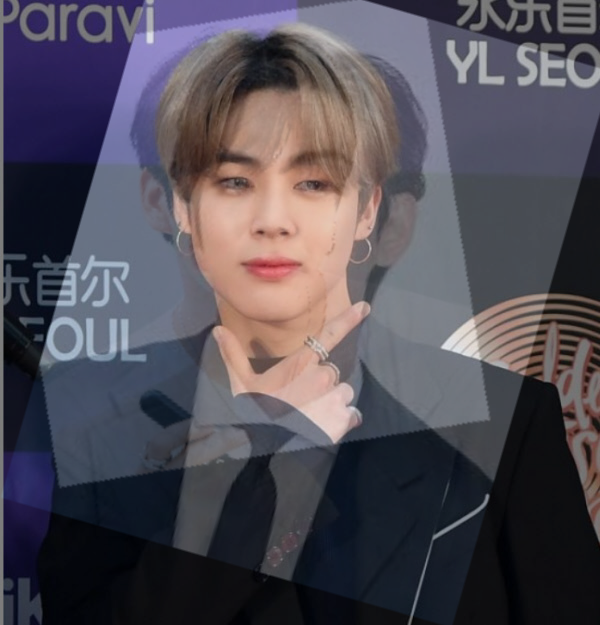

In [ ]:
#group2 (3명)
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image2_1.jpg")
image2 = cv2.imread("/gdrive/My Drive/image2_2.jpg")
image3 = cv2.imread("/gdrive/My Drive/image2_3.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 첫 번째 이미지와 합성한 이미지와 세 번째 이미지 합성
if combined_face_1_2 is not None:
    final_combined_face = align_faces(combined_face_1_2, image3)
    if final_combined_face is not None:
        cv2_imshow(final_combined_face)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

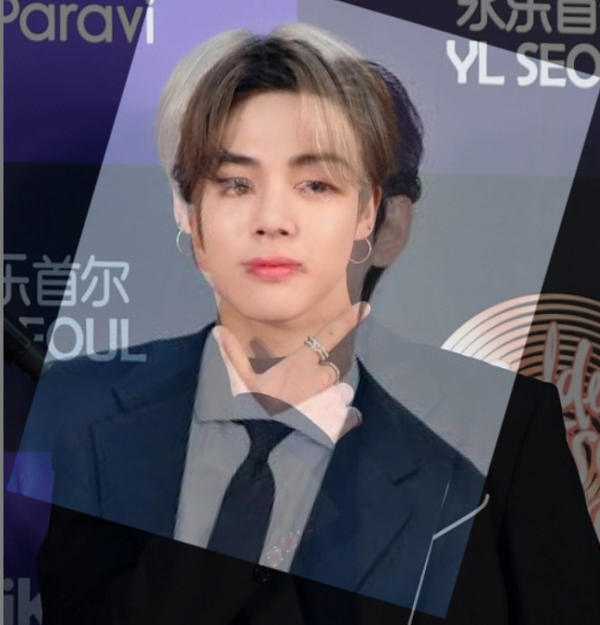

In [ ]:
#group 2 (2명)
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image2_2.jpg")
image2 = cv2.imread("/gdrive/My Drive/image2_3.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 합성된 이미지 표시
if combined_face_1_2 is not None:
    cv2_imshow(combined_face_1_2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

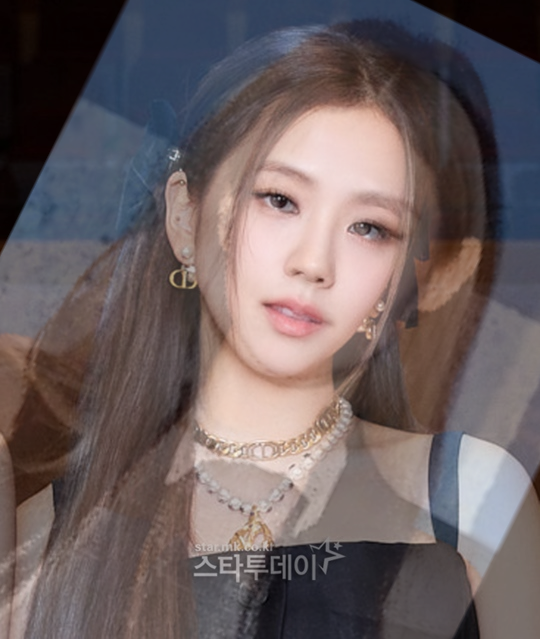

In [ ]:
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image3_1.jpg")
image2 = cv2.imread("/gdrive/My Drive/image3_2.jpg")
image3 = cv2.imread("/gdrive/My Drive/image3_3.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 첫 번째 이미지와 합성한 이미지와 세 번째 이미지 합성
if combined_face_1_2 is not None:
    final_combined_face = align_faces(combined_face_1_2, image3)
    if final_combined_face is not None:
        cv2_imshow(final_combined_face)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

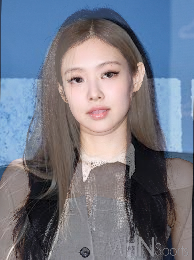

In [ ]:
# 이미지 로드
image1 = cv2.imread("/gdrive/My Drive/image3_1.jpg")
image2 = cv2.imread("/gdrive/My Drive/image3_2.jpg")

# 첫 번째 이미지와 두 번째 이미지 합성
combined_face_1_2 = align_faces(image1, image2)

# 합성된 이미지 표시
if combined_face_1_2 is not None:
    cv2_imshow(combined_face_1_2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()